In [ ]:
!gdown --id 1BrcS7MDMMCWjqV0zC9E-26E3eJiIvz5d -O  healthcare-dataset-stroke-data.csv

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1BrcS7MDMMCWjqV0zC9E-26E3eJiIvz5d
To: /content/healthcare-dataset-stroke-data.csv
100% 317k/317k [00:00<00:00, 82.6MB/s]


In [ ]:
import pandas as pd

df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.shape

(5110, 12)

In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB




```
# This is formatted as code
```

# Preprocessing

In [ ]:
df = df.drop(columns=['id'])

In [ ]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
# ENCODING
# Mengubah kolom 'gender' menjadi nilai numerik (Male: 1, Female: 0)
df['gender'] = df['gender'].replace({'Male': 1, 'Female': 0, 'Other' : 2})

# Mengubah kolom 'ever_married' menjadi nilai numerik (Yes: 1, No: 0)
df['ever_married'] = df['ever_married'].replace({'Yes': 1, 'No': 0})

# Mengubah kolom 'work_type' menjadi nilai numerik
# Anda dapat menggunakan teknik seperti one-hot encoding atau label encoding, tergantung pada jenis data
# Berikut adalah contoh menggunakan one-hot encoding:
df['work_type'] = df['work_type'].replace({'Never_worked' : -2,'Self-employed': -1, 'Private': 0, 'children' : 1, 'Govt_job' : 2})

# Mengubah kolom 'Residence_type' menjadi nilai numerik (Urban: 1, Rural: 0)
df['Residence_type'] = df['Residence_type'].replace({'Urban': 1, 'Rural': 0})

# Mengubah kolom 'smoking_status' menjadi nilai numerik
# Anda dapat menggunakan teknik seperti one-hot encoding atau label encoding, tergantung pada jenis data
# Berikut adalah contoh menggunakan label encoding:
df['smoking_status'] = df['smoking_status'].replace({'never smoked': 0, 'formerly smoked': 1, 'smokes': 2, 'Unknown' : -1})


In [ ]:
# Mencetak kolom-kolom yang memiliki missing value
kolom_missing_value = df.columns[df.isnull().any()]
print("Kolom-kolom yang memiliki missing value:")
print(kolom_missing_value)

Kolom-kolom yang memiliki missing value:
Index(['bmi'], dtype='object')


In [ ]:
# Menggantikan nilai NaN dengan nilai 0
df = df.fillna(df.mean())

In [ ]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,0,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,-1,0,202.21,28.893237,0,1
2,1,80.0,0,1,1,0,0,105.92,32.500000,0,1
3,0,49.0,0,0,1,0,1,171.23,34.400000,2,1
4,0,79.0,1,0,1,-1,0,174.12,24.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,0,1,83.75,28.893237,0,0
5106,0,81.0,0,0,1,-1,1,125.20,40.000000,0,0
5107,0,35.0,0,0,1,-1,0,82.99,30.600000,0,0
5108,1,51.0,0,0,1,0,0,166.29,25.600000,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 439.3 KB


In [ ]:
# Mengubah tipe data float menjadi int
df[['age', 'avg_glucose_level', 'bmi']] = df[['age', 'avg_glucose_level', 'bmi']].astype(int)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,1,0,1,228,36,1,1
1,0,61,0,0,1,-1,0,202,28,0,1
2,1,80,0,1,1,0,0,105,32,0,1
3,0,49,0,0,1,0,1,171,34,2,1
4,0,79,1,0,1,-1,0,174,24,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80,1,0,1,0,1,83,28,0,0
5106,0,81,0,0,1,-1,1,125,40,0,0
5107,0,35,0,0,1,-1,0,82,30,0,0
5108,1,51,0,0,1,0,0,166,25,1,0


In [ ]:
from sklearn.model_selection import train_test_split
# Memisahkan fitur (X) dan target (y)
X = df.drop(columns=['stroke'])  # Ganti 'TARGET_COLUMN' dengan nama kolom target Anda
y = df['stroke']

# Memisahkan dataset menjadi subset pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan ukuran setiap subset
print("Jumlah data pelatihan:", len(X_train))
print("Jumlah data pengujian:", len(X_test))

Jumlah data pelatihan: 4088
Jumlah data pengujian: 1022


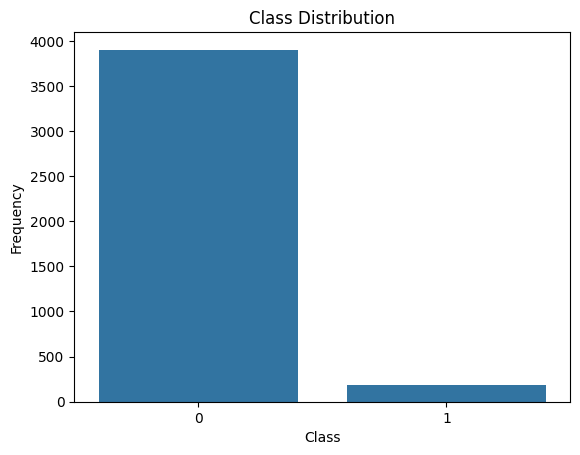

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Misalkan data Anda disimpan dalam DataFrame pandas
df = pd.DataFrame({'class': y_train})

# Visualisasi distribusi kelas
sns.countplot(x='class', data=df)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution')
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Misalkan X_train dan y_train adalah data latih
# Oversampling dengan SMOTE
smote = SMOTE()
X_res, y_res = smote.fit_resample(X_train, y_train)

# Undersampling dengan RandomUnderSampler
undersample = RandomUnderSampler()
X_res, y_res = undersample.fit_resample(X_train, y_train)

# Kombinasi Oversampling dan Undersampling dalam pipeline
steps = [('o', SMOTE()), ('u', RandomUnderSampler())]
pipeline = Pipeline(steps=steps)
X_res, y_res = pipeline.fit_resample(X_train, y_train)


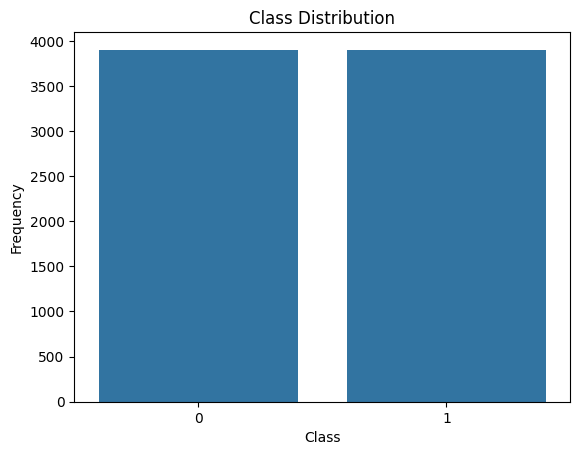

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Misalkan data Anda disimpan dalam DataFrame pandas
df = pd.DataFrame({'class': y_res})

# Visualisasi distribusi kelas
sns.countplot(x='class', data=df)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution')
plt.show()


In [ ]:
print(X_res)

      gender  age  hypertension  heart_disease  ever_married  work_type  \
0          1   79             0              0             1         -1   
1          0   62             0              0             1          0   
2          0   21             0              0             0          0   
3          1   31             0              0             1          2   
4          0   31             0              0             0          0   
...      ...  ...           ...            ...           ...        ...   
7797       0   60             0              0             1          0   
7798       0   52             0              0             1          0   
7799       0   78             0              0             0          0   
7800       0   73             1              0             1          0   
7801       0   46             0              0             1          0   

      Residence_type  avg_glucose_level  bmi  smoking_status  
0                  0                

In [ ]:
data_array = X_res.values

In [ ]:
X_res = data_array

In [ ]:
X_res

array([[  1,  79,   0, ..., 112,  28,   1],
       [  0,  62,   0, ...,  88,  36,  -1],
       [  0,  21,   0, ...,  59,  33,   0],
       ...,
       [  0,  78,   0, ..., 132,  22,   0],
       [  0,  73,   1, ...,  70,  26,   0],
       [  0,  46,   0, ...,  78,  30,   0]])

In [ ]:
# learning_rate = 0.1
# iterations = 5000
# N = y_res.size

# # Input features
# input_size = 10

# # Hidden layers (tanyain romo jg harusnya brp)
# hidden_size = 2

# # Output layer
# output_size = 2

In [ ]:
# import numpy as np
# np.random.seed(10)

# # Hidden layer
# W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))

# # Output layer
# W2 = np.random.normal(scale=0.5, size=(hidden_size , output_size))

In [ ]:
# print(W1)

In [ ]:
# Helper functions

# def sigmoid(x):
#     return 1 / (1 + np.exp(-x))

# def mean_squared_error(y_pred, y_true):
#     # One-hot encode y_true (i.e., convert [0, 1, 2] into [[1, 0, 0], [0, 1, 0], [0, 0, 1]])
#     y_true_one_hot = np.eye(output_size)[y_true]

#     # Reshape y_true_one_hot to match y_pred shape
#     y_true_reshaped = y_true_one_hot.reshape(y_pred.shape)

#     # Compute the mean squared error between y_pred and y_true_reshaped
#     error = ((y_pred - y_true_reshaped)**2).sum() / (2*y_pred.size)

#     return error

# def accuracy(y_pred, y_true):
#     acc = y_pred.argmax(axis=1) ==  y_true.argmax(axis=1)
#     return acc.mean()

# results = pd.DataFrame(columns=["mse", "accuracy"])


In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_res)
X_test_scaled = scaler.transform(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [ ]:
# results

In [ ]:

import numpy as np
# Updated network architecture
input_size = X_train_scaled.shape[1]  # Automatically determine the input size
hidden_size1 = 64  # First hidden layer with 64 neurons
hidden_size2 = 32 # Second hidden layer with 32 neurons
output_size = 2

# Initialize weights/ bobot
W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size1))
W2 = np.random.normal(scale=0.5, size=(hidden_size1, hidden_size2))
W3 = np.random.normal(scale=0.5, size=(hidden_size2, output_size))

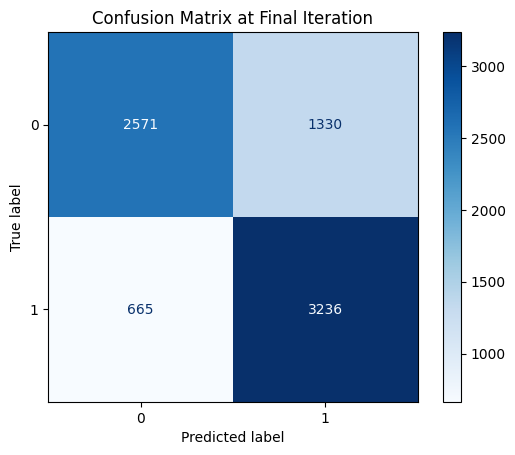

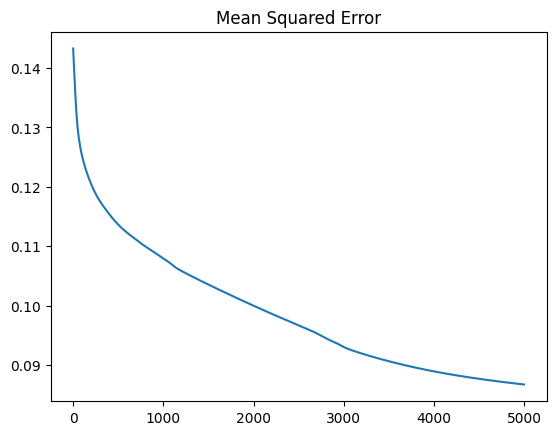

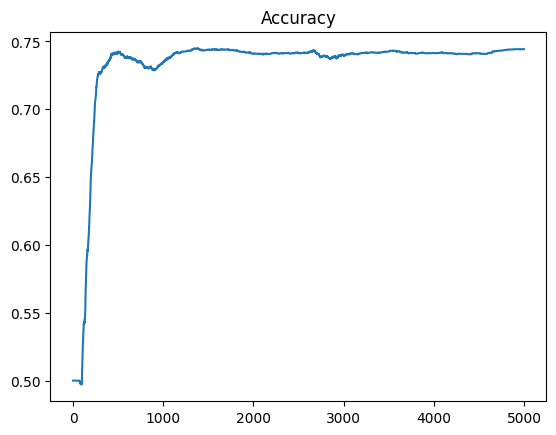

In [ ]:
# mengatur beberapa parameter untuk pelatihan model
learning_rate = 0.01
iterations = 5000
N = y_res.size

results = pd.DataFrame(columns=["mse", "accuracy"])

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mean_squared_error(y_pred, y_true):
    y_true_one_hot = np.eye(output_size)[y_true]
    y_true_reshaped = y_true_one_hot.reshape(y_pred.shape)
    error = ((y_pred - y_true_reshaped) ** 2).sum() / (2 * y_pred.size)
    return error

def accuracy(y_pred, y_true):
    return np.mean(np.argmax(y_pred, axis=1) == y_true)

for itr in range(iterations):
    # Feedforward propagation
    Z1 = np.dot(X_res, W1)
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)
    Z3 = np.dot(A2, W3)
    A3 = sigmoid(Z3)

    # Calculate error
    mse = mean_squared_error(A3, y_res)
    acc = accuracy(A3, y_res)
    new_row = pd.DataFrame({"mse": [mse], "accuracy": [acc]})
    results = pd.concat([results, new_row], ignore_index=True)

    # Backpropagation
    E3 = A3 - np.eye(output_size)[y_res]
    dW3 = E3 * A3 * (1 - A3)
    E2 = np.dot(dW3, W3.T) * A2 * (1 - A2)
    dW2 = E2
    E1 = np.dot(dW2, W2.T) * A1 * (1 - A1)
    dW1 = E1

    # Update weights
    W3_update = np.dot(A2.T, dW3) / N
    W2_update = np.dot(A1.T, dW2) / N
    W1_update = np.dot(X_res.T, dW1) / N
    W3 -= learning_rate * W3_update
    W2 -= learning_rate * W2_update
    W1 -= learning_rate * W1_update

# Plot the final confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = np.argmax(A3, axis=1)
final_conf_matrix = confusion_matrix(y_res, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=final_conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix at Final Iteration")
plt.show()

# Plot MSE and Accuracy
results.mse.plot(title="Mean Squared Error")
plt.show()
results.accuracy.plot(title="Accuracy")
plt.show()

In [ ]:
def calculate_precision_recall(y_true, y_pred):
    TP = sum((y_true == 1) & (y_pred == 1))
    FP = sum((y_true == 0) & (y_pred == 1))
    FN = sum((y_true == 1) & (y_pred == 0))

    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0

    return {'precision': precision, 'recall': recall}

results = calculate_precision_recall(y_res, y_pred)
print(f"Precision: {results['precision']}")
print(f"Recall: {results['recall']}")

Precision: 0.7087166009636443
Recall: 0.8295308895155088


In [ ]:
Z1 = np.dot(X_test_scaled, W1)
A1 = sigmoid(Z1)
Z2 = np.dot(A1, W2)
A2 = sigmoid(Z2)
Z3 = np.dot(A2, W3)
A3 = sigmoid(Z3)

test_acc = accuracy(A3, y_test)
print("Test accuracy: {}".format(test_acc))

Test accuracy: 0.9021526418786693
